In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

time = 100  # Number of simulations
d_mu = 100  # Demand 
d_std = 25   # Demand's standard deviation
d = np.maximum(np.random.normal(d_mu, d_std, time).round(0).astype(int), 0) # random demand with minimum value 0

In [26]:
L, R, alpha = 4, 1, 0.95  # L is a lead time, R is a review period, alpha is the CSL
z = norm.ppf(alpha)       # calculate z value
x_std = np.sqrt(L+R)*d_std  #standard deviation over lead time and review period
Ss = np.round(x_std * z).astype(int)  # Safety stock 
Cs = 1/2 * d_mu * R # Cycle stock D over Review period
Is = d_mu * L  # inventory on the way
S = Ss + 2 * Cs + Is # Total inventory 

In [32]:
hand = np.zeros(time, dtype=int) # Create new empty array with size of the time, valuies are integer
transit = np.zeros((time, L+1), dtype=int) #Create new  2nd empty array

In [33]:
hand[0] = S - d[0] # Level of the inventory after first period , S - demand(first period)
transit[1,-1] = d[0] # put the IOH to first row and last position

In [34]:
stockout_period = np.full(time, False, dtype=bool) # Create an array with lenght time and all the FALSE
stockout_cycle = [] # Create array stockout cycle

In [35]:
for t in range(1,time):
    if transit[t-1, 0] > 0: # t-1 it is a previous perid , position 0, that means oreder received!
        stockout_cycle.append(stockout_period[t-1])
    hand[t] = hand[t-1] - d[t] + transit[t-1, 0] # on hand previous period - demand + receieved order
    stockout_period[t] = hand[t] < 0   
    #hand[t] = max(0, hand[t]) backorders
    transit[t,:-1] = transit[t-1, 1:]   
    if 0 == t%R:   # check the review period % t divided by R
        net = hand[t] + transit[t].sum()   
        transit[t,L] = S - net

    Demand  On-hand                In Transit
5       68     -113  [111, 264, 123, 139, 68]
6       77      -79   [264, 123, 139, 68, 77]
7       89       96    [123, 139, 68, 77, 89]
8      151       68    [139, 68, 77, 89, 151]
9       72      135     [68, 77, 89, 151, 72]
..     ...      ...                       ...
95     101       72  [103, 121, 109, 86, 101]
96     167        8  [121, 109, 86, 101, 167]
97     127        2  [109, 86, 101, 167, 127]
98     111        0  [86, 101, 167, 127, 111]
99      91       -5  [101, 167, 127, 111, 91]

[95 rows x 3 columns]


<AxesSubplot:title={'center':'Inventory Policy (1, 592)'}>

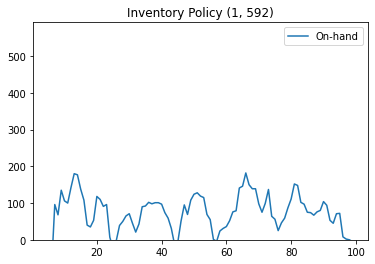

In [36]:
df = pd.DataFrame(data = {"Demand":d, "On-hand":hand, "In Transit":list(transit)})
df = df.iloc[R+L: ,:]
print(df)
df["On-hand"].plot(title="Inventory Policy (%d, %d)" %(R,S), ylim = (0,S), legend = True)


In [37]:
print("Alpha:", alpha*100)
SL_alpha = 1 - sum(stockout_cycle)/len(stockout_cycle)
print("Cycle Service Level:", round(SL_alpha*100,1))
SL_period = 1 - sum(stockout_period)/time
print("Period Service Level:", round(SL_period*100,1))

Alpha: 95.0
Cycle Service Level: 92.6
Period Service Level: 91.0
